# read json file and plot start points

In [121]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
os.getcwd()

'/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic'

In [208]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'

In [209]:
pwd

'/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic'

In [210]:
fileName = '/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/mimic_start_position.json'
with open(fileName) as json_data:
# with open(flnames[0]) as json_data:
    mimic_intendedStartPos = json.load(json_data)
mimic_intendedStartPos,type(mimic_intendedStartPos)

('{"x": [1089, 453, 839, 1113, 241, 286, 985, 77, 1050, 920, 82, 1064, 1106, 770, 773, 933, 258, 7, 442, 959, 1108, 1131, 666, 561, 1075, 372, 118, 1195, 948, 219, 162, 15, 873, 987, 558, 1141, 620, 162, 473, 210, 633, 83, 743, 1023, 667, 785, 245, 1170, 1126, 675, 1031, 665, 40, 88, 426, 1089, 327, 741, 98, 556, 901, 1152, 1155, 26, 1075, 1172, 551, 885, 658, 1066, 558, 939], "y": [745, 444, 476, 291, 497, 487, 37, 616, 259, 436, 280, 531, 157, 438, 505, 643, 802, 143, 829, 297, 634, 280, 72, 829, 546, 528, 417, 281, 871, 213, 105, 431, 75, 694, 276, 224, 486, 206, 793, 621, 554, 488, 193, 162, 634, 369, 675, 388, 326, 514, 19, 191, 24, 538, 402, 659, 16, 107, 73, 413, 517, 101, 640, 788, 185, 511, 587, 34, 261, 796, 219, 777]}',
 str)

In [211]:
if type(mimic_intendedStartPos) == str:
    print('evaluating string')
    mimic_intendedStartPos = eval(mimic_intendedStartPos)
mimic_intendedStartPos.keys(), len(mimic_intendedStartPos['x']),type(mimic_intendedStartPos)

evaluating string


(dict_keys(['x', 'y']), 72, dict)

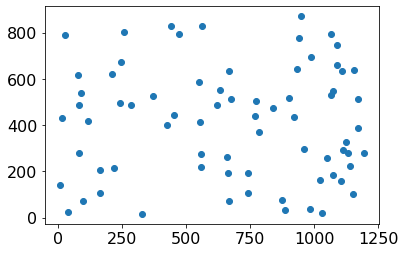

In [212]:
plt.plot(data1['x'],data1['y'], ls = 'None',marker = 'o')

- Were the above positions plotted correctly? 
- Looks like there was a bug in the code which made 
    - all the black files with positions from 0-35 (but labelled 1-36)
    - all the grey files with positions from 36-72 (also labelled 36-71)

Examples below


In [213]:
mimic_intendedStartPos['x'][71],mimic_intendedStartPos['y'][71] # corresponds more with filename ending with 71

(939, 777)

In [214]:
mimic_intendedStartPos['x'][19],mimic_intendedStartPos['y'][19] # corresponds more with filename ending with 20

(959, 297)

- double-checking this in the next step by comparing initial positions in the json file

In [215]:
if type(mimic_intendedStartPos) ==dict:
    print('before: ',mimic_intendedStartPos['x'][:3],mimic_intendedStartPos['y'][:3])
    mimic_intendedStartPos = np.array([mimic_intendedStartPos['x'],mimic_intendedStartPos['y']]).T
mimic_intendedStartPos[:3,:]

before:  [1089, 453, 839] [745, 444, 476]


array([[1089,  745],
       [ 453,  444],
       [ 839,  476]])

# Getting initial positions of true prey from the .json files

In [216]:
file

'/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic/mimic_flipped__cheatpred_subt150_Grey_Posx_850_InvisPreyLocInd_71.json'

In [233]:
folder =  '/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic'
json_files = []
file_ind = []
for file in os.listdir(folder):
    # check the files which are end with specific extension
    if (file.find('InvisPreyLocInd')!=-1) and (file.find('cheat')!=-1)  and (file.endswith(".json")):
        # print path name of selected files
        #json_files.append(os.path.join(root, file))
        file_ind.append(int(file.split('_')[-1].split('.')[0])) # initPos_suffix
        json_files.append(os.path.join(folder, file))
#_print('\n'.join(json_files))
json_files = [x for _, x in sorted(zip(file_ind, json_files))]
x = json_files[35]
json_files[35]=json_files[36]
json_files[36] = x
print(len(json_files))

72


In [234]:
data_initPos = []
for file in json_files:
    fileName = os.path.join(folder,file)
    #print(fileName)

    os.chdir(folder)
    #flnames = glob.glob("*.json")
    # Reading the json as a dict
    with open(fileName) as json_data:
    # with open(flnames[0]) as json_data:
        data_initPos.append(json.load(json_data))
len(data_initPos)#,data_initPos[0]

72

In [235]:
data_initPos[0]['timeStampStates'][0]['entityStates'][1]

{'name': 'invisPreyAgent',
 'position': {'x': 1089, 'y': 745},
 'rotation': 270,
 'scale': {'x': 1, 'y': 1},
 'currentMotiv': None}

In [236]:
len(data_initPos)

72

In [237]:
dist_all = []
timept_millisec = 0
agent_ind = 1

for i in range(len(data_initPos)):
    agent_name = data_initPos[i]['timeStampStates'][timept_millisec]['entityStates'][agent_ind]['name']
    if agent_name == 'invisPreyAgent':
        pos = data_initPos[i]['timeStampStates'][timept_millisec]['entityStates'][agent_ind]['position']
        print(i,pos['x'])
    #if pos['x'] ==82:
     #   print(pos)
    dist_all.append([pos['x'],pos['y']])
dist_all = np.array(dist_all)
dist_all.shape

0 1089
1 453
2 839
3 1113
4 241
5 286
6 985
7 77
8 1050
9 920
10 82
11 1064
12 1106
13 770
14 773
15 933
16 258
17 7
18 442
19 959
20 1108
21 1131
22 666
23 561
24 1075
25 372
26 118
27 1195
28 948
29 219
30 162
31 15
32 873
33 987
34 558
35 1141
36 620
37 162
38 473
39 210
40 633
41 83
42 743
43 1023
44 667
45 785
46 245
47 1170
48 1126
49 675
50 1031
51 665
52 40
53 88
54 426
55 1089
56 327
57 741
58 98
59 556
60 901
61 1152
62 1155
63 26
64 1075
65 1172
66 551
67 885
68 658
69 1066
70 558
71 939


(72, 2)

In [ ]:
json_files_ind = [int(i.split('/')[-1].split('_')[-1][:-5]) for i in json_files]
json_files_ind

In [251]:
df = pd.DataFrame({'Intended_x':mimic_intendedStartPos[:,0],'Intended_y':mimic_intendedStartPos[:,1], 'Intended_flname': np.arange(1,73),
'saved_init_x':dist_all[:,0],'saved_init_y':dist_all[:,1], 'filename_suff':json_files_ind})
df

,Intended_x,Intended_y,Intended_flname,saved_init_x,saved_init_y,filename_suff
0,1089,745,1,1089,745,1
1,453,444,2,453,444,2
2,839,476,3,839,476,3
3,1113,291,4,1113,291,4
4,241,497,5,241,497,5
...,...,...,...,...,...,...
67,885,34,68,885,34,67
68,658,261,69,658,261,68
69,1066,796,70,1066,796,69
70,558,219,71,558,219,70


In [252]:
np.where(df['Intended_flname']==df['filename_suff'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),)

In [253]:
np.where(df['Intended_flname']==df['filename_suff']+1)

(array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71]),)

- So yeah verified, 
let's rename all files to the range 0-71 in the next version!!
- i.e., renaming all the black predator files: 1-36 to 0-35

In [157]:
for i in range(3):
    print(df.iloc[i ,0]/df.iloc[i,1],df.iloc[i,2]/df.iloc[i,3])

1.461744966442953 0.29285714285714287
1.0202702702702702 1.3462469733656175
1.7626050420168067 26.029411764705884


In [290]:
bad_location_inds_filename = [i for i in [2, 6, 9, 14, 17, 18, 21, 23, 29, 36, 44, 55, 57, 62, 63, 65,68]] # prey goes off screen
bad_locations_pred_pos = []#['L','R','L','L','L', 'R','R','L','R','L','R']
bad_locations_subt = []#[0,0,30,30,60,60,90,90,90,90]
for file in json_files:
    if int(file.split('_')[-1][:-5]) in bad_location_inds_filename:
        #print(int(file.split('_')[-1][:-5]) )
        bad_locations_pred_pos.append(int(file.split('_')[-3]))
        bad_locations_subt.append(int(file.split('_')[-6][4:]))
print(len(bad_locations_pred_pos))
print(len(bad_locations_subt))
print(len(bad_location_inds_filename))
color_bad36= 'Black'
for i,loc_ in enumerate(bad_location_inds_filename):
    if loc_ < 36:
        bad_location_inds_filename[i] -= 1
    if loc_ ==36:
        if color_bad36.lower() == 'black':
            bad_location_inds_filename[i] -= 1
        #raise Exception('change something!')
bad_locations_subt = [0,0,30,30,60,60,90,90,90,90]
print(bad_location_inds_filename)

# WHY DIFF NR OF FILE?!

18
18
17
[1, 5, 8, 13, 16, 17, 20, 22, 28, 35, 44, 55, 57, 62, 63, 65, 68]


In [265]:
i=0
subt=0
[bad_location_inds_filename[i] for i, x in enumerate(bad_locations_pred_pos) if ((x == "L") & (bad_locations_subt[i]==subt))]

[1]

In [269]:
x,y = np.array(df['Intended_x']),np.array(df['Intended_y'])

(array([1089,  453,  839, 1113,  241,  286,  985,   77, 1050,  920,   82,
        1064, 1106,  770,  773,  933,  258,    7,  442,  959, 1108, 1131,
         666,  561, 1075,  372,  118, 1195,  948,  219,  162,   15,  873,
         987,  558, 1141,  620,  162,  473,  210,  633,   83,  743, 1023,
         667,  785,  245, 1170, 1126,  675, 1031,  665,   40,   88,  426,
        1089,  327,  741,   98,  556,  901, 1152, 1155,   26, 1075, 1172,
         551,  885,  658, 1066,  558,  939]),
 array([745, 444, 476, 291, 497, 487,  37, 616, 259, 436, 280, 531, 157,
        438, 505, 643, 802, 143, 829, 297, 634, 280,  72, 829, 546, 528,
        417, 281, 871, 213, 105, 431,  75, 694, 276, 224, 486, 206, 793,
        621, 554, 488, 193, 162, 634, 369, 675, 388, 326, 514,  19, 191,
         24, 538, 402, 659,  16, 107,  73, 413, 517, 101, 640, 788, 185,
        511, 587,  34, 261, 796, 219, 777]))

In [270]:
import os
import json
os.getcwd()

'/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic'

In [271]:
if type(data1) == str:
    print('evaluating string')
    data1 = eval(data1)
data1.keys(), len(data1['x'])

(dict_keys(['x', 'y']), 72)

In [289]:
len(bad_locations_subt), len(bad_location_inds_filename), len(bad_locations_pred_pos)

(10, 17, 18)

IndexError: list index out of range

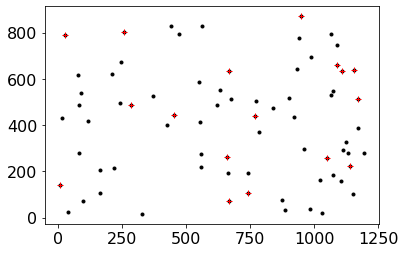

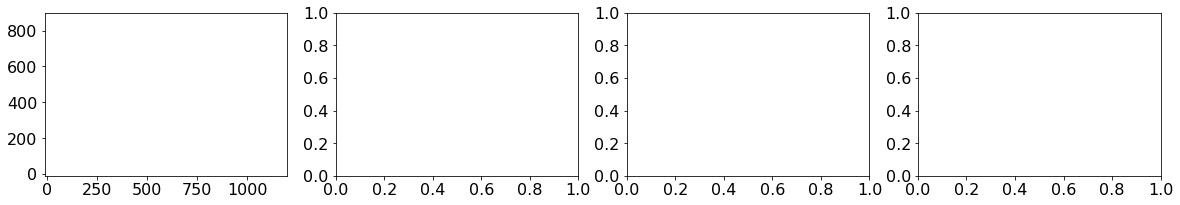

In [286]:

plt.plot(x,y, ls = 'None',marker = '.', color='k')
plt.plot(x[bad_location_inds_filename], y[bad_location_inds_filename],ls = 'None',marker = '+',color='r')

fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,3))
for i,subt in enumerate([0,30,60,90,120,150]):
    ax = axes[i]
    ax.set_xlim(-10,1200)
    ax.set_ylim(-10,900)
    ind = [bad_location_inds_filename[i] for i, x in enumerate(bad_locations_pred_pos) if ((x == 350) & (bad_locations_subt[i]==subt))]
    ax.plot(x[ind], y[ind],ls = 'None',marker = '^',markersize=10, alpha = .5,color='g',label = 'truePrey_predLeft')
    print('left',subt, ind,'xy=',[x[ind], y[ind]])

    ind =  [bad_location_inds_filename[i] for i, x in enumerate(bad_locations_pred_pos) if ((x == 850) & (bad_locations_subt[i]==subt))]
    ax.plot(x[ind], y[ind],ls = 'None',marker = 'v',markersize=10, alpha = .5,color='b',label ='truePrey_predRight')
    print('right',subt, ind,'xy=',[x[ind], y[ind]])

    ax.plot(350,450, marker='o',markersize=10, alpha = .5,color='g')
    ax.plot(850,450, marker='o',markersize=10, alpha = .5,color='b')
    if i == 0:
        ax.legend(bbox_to_anchor=[1,1.5])
    ax.set_title('Subtlety '+str(subt))
#plt.tight_layout()

In [4]:
rows =  np.arange((subt-1)*6,subt*6)
#rows = [int(i) for i in rows]
#rows = slice(rows)
rows

NameError: name 'np' is not defined

0 [0 1 2 3 4 5]


NameError: name 'subt_angle' is not defined

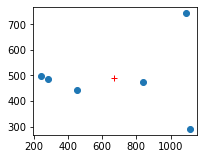

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1,figsize=(10,8))
for subt in range(6):
    plt.subplot(3,3,subt+1)
    rows =  np.arange(subt*6,(subt+1)*6)
    print(subt, rows)
    x,y = np.array(data1['x'])[rows],np.array(data1['y'])[rows]
    plt.plot(x,y,marker = 'o',ls = 'None')
    plt.plot(x.mean(),y.mean(),color='r',marker = '+')
    plt.title('Subtlety ' + str(subt_angle[subt]), fontweight='bold')

plt.tight_layout()

# extra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1,figsize=(10,8))
for subt in range(6):
    plt.subplot(3,3,subt+1)
    rows =  np.arange(subt*6,(subt+1)*6)
    print(subt, rows)
    x,y = np.array(data1['x'])[rows],np.array(data1['y'])[rows]
    plt.plot(x,y,marker = 'o',ls = 'None')
    plt.plot(x.mean(),y.mean(),color='r',marker = '+')
    plt.title('Subtlety ' + str(subt_angle[subt]), fontweight='bold')

plt.tight_layout()

In [ ]:
import cv2
import os

In [ ]:
'''output_folder = '/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/first_frames_mimic'
#for angle in [0,30,60,90,120,150]:
#    os.mkdir(os.path.join(output_folder,str(angle)))



parent_folder =  '/Users/f0053cz/Documents/psyanim_notapp/psyanim_notapp_new_mimic_expt/test_version/vids/mimic'
webm_files = []
for file in os.listdir(parent_folder): # get filenames
    if (file.find('cheat')!=-1) and file.endswith(".webm"): # check the files which are end with specific extension
        # print path name of selected files
        #json_files.append(os.path.join(root, file))
        #print(file)
        webm_files.append(os.path.join(file))
#print('\n'.join(webm_files))

for file in webm_files: # get 1st frame
    vs = cv2.VideoCapture(os.path.join(parent_folder,file))
    vs.set(cv2.CAP_PROP_POS_FRAMES, 0) # set position as 1st frame
    ret, frame = vs.read() # read 1st frame
    #print(ret)
    if ret == True:
        img_name = os.path.join(output_folder,file[:-4]+'png')
        cv2.imwrite(img_name, frame)
    else:
        print('False!!')
'''